In [1]:
from WumpusWorld import ObsWumpusWorld
import numpy as np
import matplotlib.pyplot as plt

Testing
Generating Fully Observable Wumpus World with the following characteristics
82 states
-1 step reward
-10 hole reward
1 goal reward
-10 wumpus reward
..X
.O.
..%
Calculating optimal policy
Policy,  [0 3 0 0 0 0 3 3 0 3 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 3 1 3 3 0 0 0 0 0 3 0 0
 3 0 0 0 0 0 3 0 3 0 0 0 0 0 0 1 0 3 3 0 0 0 0 0 3 0 3 3 0 0 0 0 0 0 0 0 3
 0 0 0 0 0 3 0 0]
^>^
^^^
^>^
Values
Wumpus at  0 0
%>X
^O^
>>^
Wumpus at  1 0
>%X
^O^
^>^
Wumpus at  2 0
^>%
^O^
^>v
Wumpus at  0 1
>>X
%O^
^>^
Wumpus at  1 1
^>X
^%^
^>^
Wumpus at  2 1
>^X
^O%
^v^
Wumpus at  0 2
>>X
^O^
%>^
Wumpus at  1 2
>>X
^O^
^%^
Wumpus at  2 2
^>X
^O^
^>%


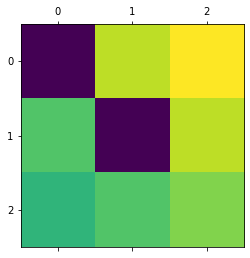

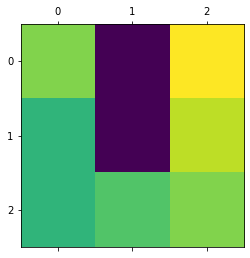

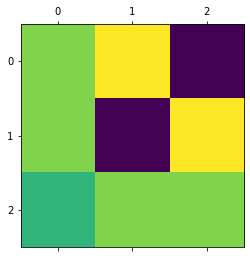

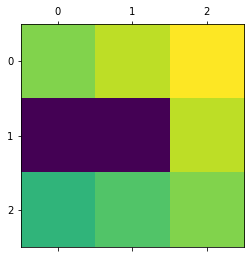

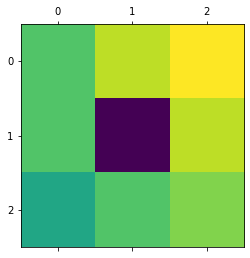

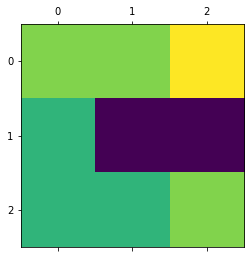

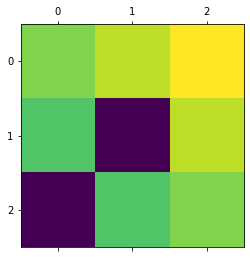

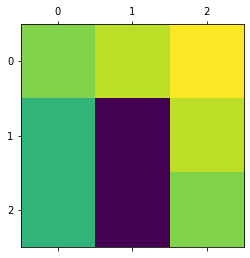

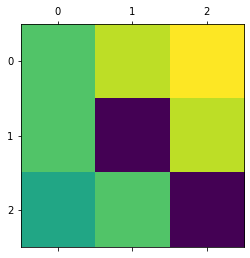

In [3]:
print("Testing")
np.random.seed(2134)
height = 3
width = 3
environment = ObsWumpusWorld(width, height, 0.0, 0)
environment.render()

from ValueIteration import value_iteration
print("Calculating optimal policy")
policy, V, Q = value_iteration(environment, 1000, .9)

print("Policy, ", policy)
policy_string="^v<>"
for y in range(height):
    for x in range(width):
        s = environment.get_state(x,y, environment.wumpus_x, environment.wumpus_y)
        print(policy_string[policy[s]], end="")
    print("")

print("Values")
Vxy = np.zeros([height, width])
for wy in range(height):
    for wx in range(width):
        if (environment.maze[wx, wy]!=environment.WALL):
            print("Wumpus at ", wx, wy)
            for y in range(height):
                for x in range(width):    
                    s = environment.get_state(x,y, wx, wy)
                    if (x == wx and y == wy):
                        print("%", end="")
                    elif environment.maze[x, y]==environment.WALL:
                        print("#", end="")
                    elif environment.maze[x, y]==environment.GOAL:
                        print("X", end="")
                    elif environment.maze[x, y]==environment.HOLE:
                        print("O", end="")
                    else:
                        print(policy_string[policy[s]], end="")
                    Vxy[x,y] = V[s]
                print("")
            #plt.matshow(environment.maze.transpose())
            plt.matshow(Vxy.transpose())